First we load example simulation functions.

Simulation parameters can be changed by modifying 'param_dict'.

In [8]:
%matplotlib inline
import os
from stick_population_example import init_example_pop, simulate_populations, plot_LFP_PSDs, param_dict
param_dict["num_cells"] = 10

First we initialize the stick population

In [9]:
init_example_pop()

Initializing cell positions and rotations ...
Initializing input spike trains


We now run all single cell simulations. This may take a while depending on the parameters in "param_dict". Have a coffee.

In [13]:
sim_folder = os.path.join(param_dict["root_folder"], param_dict["save_folder"], "simulations")
os.system("rm {}/*.npy".format(sim_folder))
simulate_populations()

Simulating example stick population
Finished population top; increase; None; 0.0
summing LFP and removing single LFP files
Remove files ../stick_pop_example/simulations/center_sig_stick_pop_example_infinite_neurite_top_generic_increase_None_0.00_*.npy
Finished population top; increase; None; 1.0
summing LFP and removing single LFP files
Remove files ../stick_pop_example/simulations/center_sig_stick_pop_example_infinite_neurite_top_generic_increase_None_1.00_*.npy
Finished population top; increase; 2.0; 0.0
summing LFP and removing single LFP files
Remove files ../stick_pop_example/simulations/center_sig_stick_pop_example_infinite_neurite_top_generic_increase_2.0_0.00_*.npy
Finished population top; increase; 2.0; 1.0
summing LFP and removing single LFP files
Remove files ../stick_pop_example/simulations/center_sig_stick_pop_example_infinite_neurite_top_generic_increase_2.0_1.00_*.npy
Simulating task 50 of 80
Finished population homogeneous; increase; None; 0.0
summing LFP and removing s

Then we plot results the results.

FileNotFoundError: [Errno 2] No such file or directory: '../stick_pop_example/simulations/summed_center_signal_stick_pop_example_infinite_neurite_top_generic_increase_None_0.00_99um.npy'

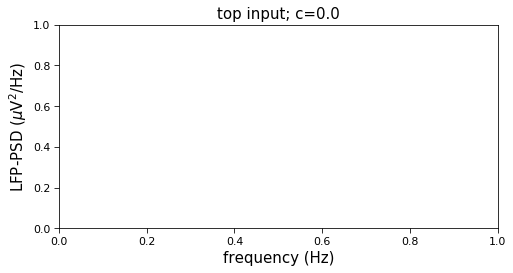

In [14]:
plot_LFP_PSDs()